# Tutorial to handle input and output for fits files

### creation date : Wed 2016, June 1st
### Author : Sylvie Dagoret-Campagne


The purpose is to learn how to generate a masterbias or masterdark, or whatever else fits file in the
process of CCD reduction

In [134]:
from astropy.io import fits
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
#config InlineBackend.rc = {}
#config Backend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")  # default config obtained from astropy examples
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [135]:
from datetime import datetime, timedelta
from pytz import timezone
import pytz

In [152]:
#now=datetime.now()
#now=datetime.today()
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print datestr

2016-06-01 09:06:08.617043


In [153]:
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print date_of_analysis

2016-06-01T09:06:08


In [138]:
a =np.random.normal(1.0, scale=0.1, size=(100, 100))

In [139]:
b =np.random.normal(1.0, scale=0.1, size=(500, 500))

In [140]:
c =np.random.normal(1.0, scale=0.5, size=(1000, 1000))

In [141]:
export_array=[a,b,c]

In [142]:
hdul = fits.HDUList() 
hdul.append(fits.PrimaryHDU()) 

hdul.info()
header=hdul[0].header

print repr(header)
header['IMAGETYP']='master_bias'
header['DATE-ANA']=date_of_analysis

print repr(header)

for img in export_array: 
    hdul.append(fits.ImageHDU(data=img)) 
    
hdul.writeto('output.fits') 

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
IMAGETYP= 'master_bias'                                                         
DATE-ANA= '2016-06-01T10:51:14'                                                 


In [143]:
hdu_list = fits.open('output.fits')
hdu_list.info()

Filename: output.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                ImageHDU         7   (100, 100)   float64   
2                ImageHDU         7   (500, 500)   float64   
3                ImageHDU         7   (1000, 1000)   float64   


In [144]:
header=hdu_list[0].header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
IMAGETYP= 'master_bias'                                                         
DATE-ANA= '2016-06-01T10:51:14'                                                 

In [145]:
#header.set('IMAGETYP','toto')
#header['IMAGETYP']='master_bias'
#header['DATE']='today'

In [146]:
print repr(header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
IMAGETYP= 'master_bias'                                                         
DATE-ANA= '2016-06-01T10:51:14'                                                 


In [147]:
image_data1 = hdu_list[1].data

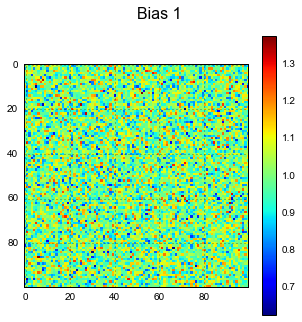

In [148]:
NX=1
NY=1
fig, axarr = plt.subplots(NY,NX,figsize=(5,5))

plt.imshow(image_data1,interpolation='nearest')
plt.colorbar()
title='Bias 1'

plt.suptitle(title,size=16)
plt.show()

In [149]:
image_data2 = hdu_list[2].data

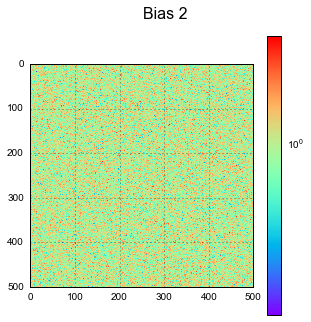

In [150]:
NX=1
NY=1
fig, axarr = plt.subplots(NY,NX,figsize=(5,5))

plt.imshow(image_data2, cmap='rainbow',norm=LogNorm(),interpolation='nearest')
plt.colorbar()
title='Bias 2'

plt.suptitle(title,size=16)
plt.show()